1 . For the function J(w) = w^2 + (54/w), implement the following methods:


(a) Use the .bracketed value (that you got in the last lab) to get to the critical point employing interval halving method and

In [ ]:
def interval_halving_method(J, a, b, eps=1e-6):

    wm = (a + b) / 2
    L = b - a
    Jwm = J(wm)

    while abs(L) >= eps:
        w1 = a + L / 4
        w2 = b - L / 4

        # Step 3
        if J(w1) < Jwm:
            b = wm
            wm = w1
        # Step 4
        elif J(w2) < Jwm:
            a = wm
            wm = w2
        else:
            a = w1
            b = w2

        # Step 5
        Jwm = J(wm)
        L = b - a

    return wm


def J(w):
    return w**2 + 54/w

print(interval_halving_method(J, 2.125, 4.375))



2.9999998807907104


(b) identify the critical point using Newton-Raphson method and


In [ ]:
def Newton_Raphson_method(J1, J2, w0, N, eps=1e-6):
  w = w0
  k = 0
  while abs(J1(w)) >= eps and k< N:
    w = w - J1(w) / J2(w)
    k += 1
  return w


def J(w):
  return w**2 + 54/w

def J1(w):
  return 2 * w - 54 / w**2

def J2(w):
  return 2 + 108 / w**3

print(Newton_Raphson_method(J1, J2, 3.25, 100, 1e-6))


2.9999999944461524


(c) verify the result manually using the optimality criteria (post this write-up as well in .jpg/.png etc).

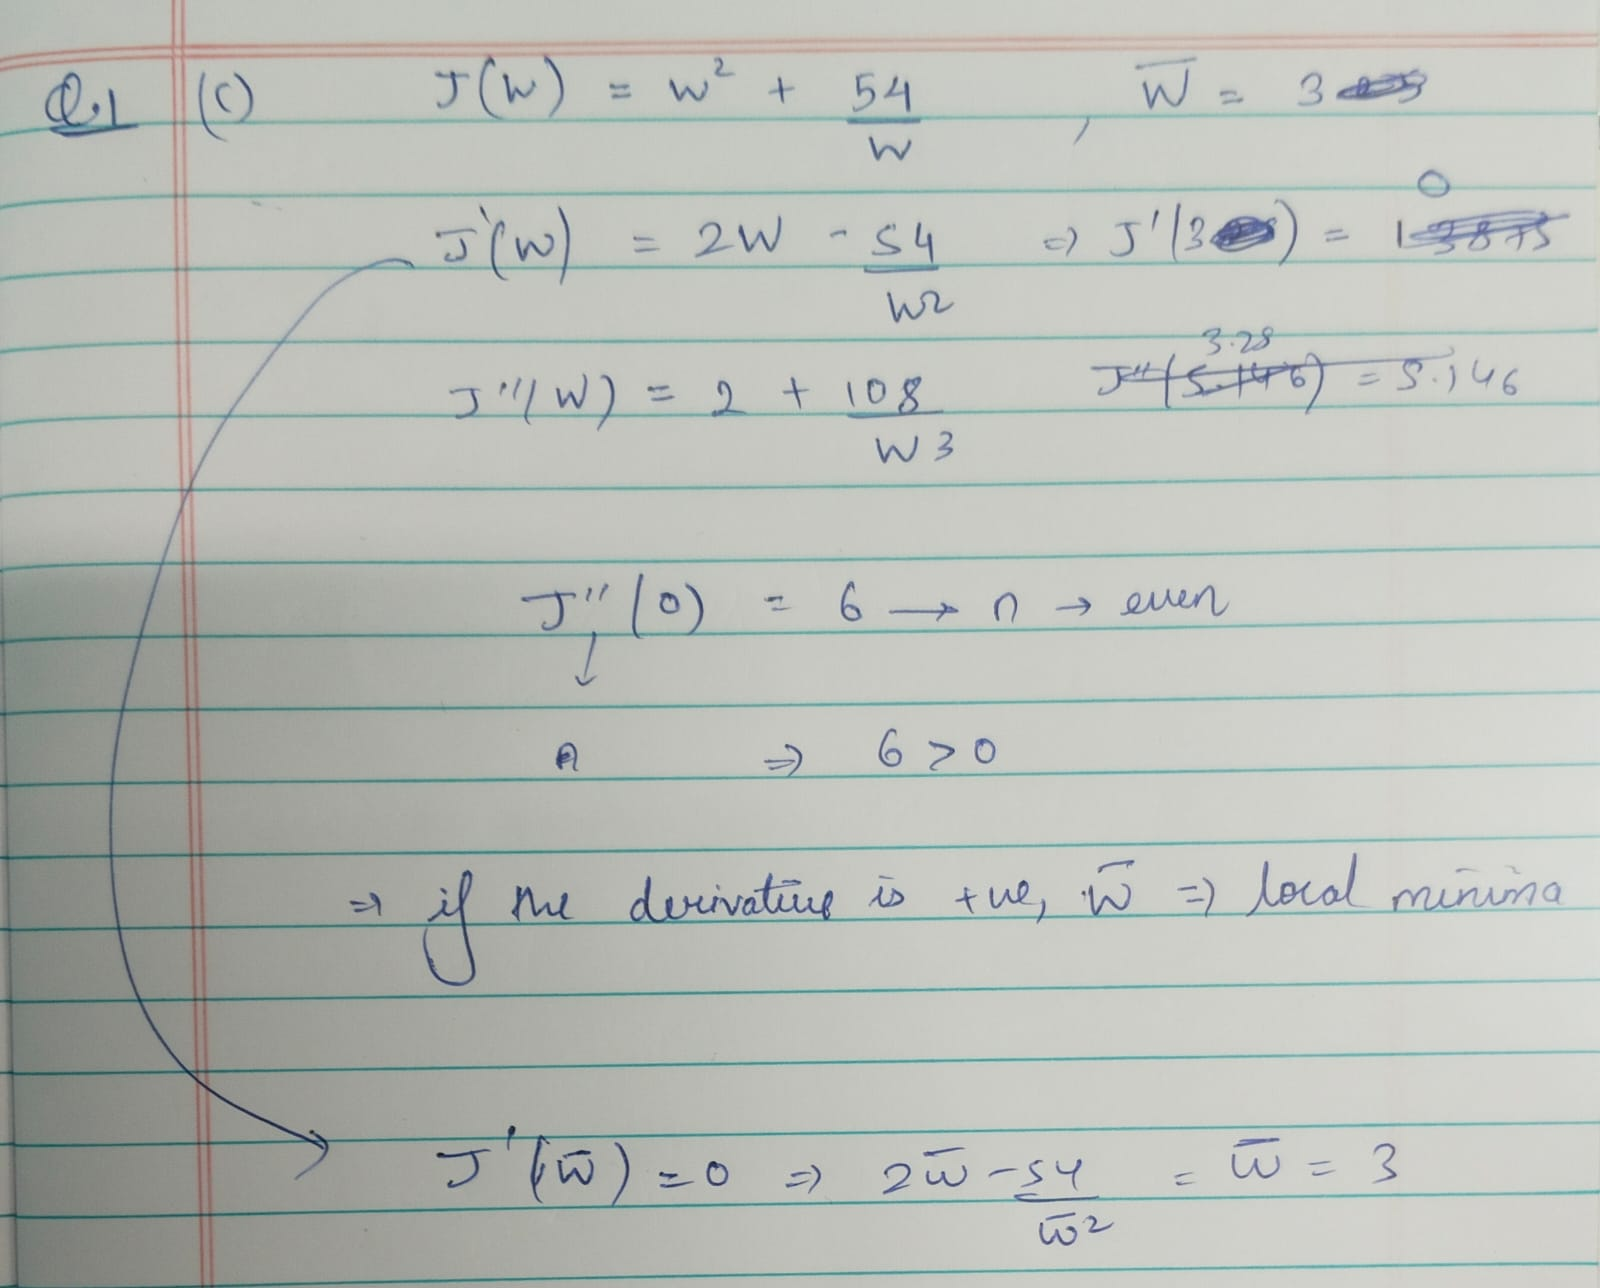

2.For the function f(w1,w2) = (w1-8)^2+ (w2-8)^2. Perform a unidirectional search along the direction vector (1,2) starting from the point (0,0) to find the minimum value of f.

In [ ]:
def f(alpha):
  w1 = alpha
  w2 = 2*alpha
  return (w1 - 8)**2 + (w2 - 8)**2

def unidirectional_search(ws, s, minalpha):
  w1 = ws[0] + minalpha*s[0]
  w2 = ws[1] + minalpha*s[1]
  return (w1,w2)

def bracketing(f, a, b, n=100):

    dw = (b - a) / n
    w1 = a
    w2 = w1 + dw
    w3 = w2 + dw

    while w3 <= b:
        if f(w1) >= f(w2) and f(w2) <= f(w3):
            return w2
        else:
            w1 = w2
            w2 = w3
            w3 = w2 + dw
    return None

alpha = bracketing(f, 0, 5, 100)
print(alpha)
ws = (0,0)
s = (1,2)
print(unidirectional_search(ws, s, alpha))



4.799999999999991
(4.799999999999991, 9.599999999999982)


3. Implement a gradient descent (GD) algorithm in Python to optimize a given objective function. The goal is to minimize the following function:
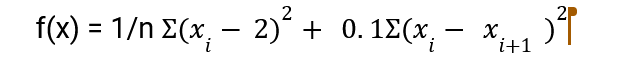

In [12]:
import random
import math
def objective_function(x):
    n = len(x)
    term1 = 0
    term2 = 0
    for i in range(n):
      term1 += (x[i]-2)**2
    for i in range(n-1):
      term2 += (x[i] - x[i+1])**2
    return (term1/n) + (0.1*term2)


def gradient(x):
  n = len(x)
  grad = [0]*n

  for i in range(n):
    grad[i] += (2/n)*(x[i] - 2)

  for i in range(n-1):
    grad[i] += 0.2*(2*x[i] - 2*x[i+1])
    grad[i+1] += 0.2*(2*x[i+1] - 2*x[i])

  return grad

def gradient_descent(x, alpha, eps, N):
  x1 = x[:]

  for i in range(N):
    grad = gradient(x1)

    x_new = [0]*(len(x1))
    for i in range(len(x1)):
      x_new[i] = x1[i] - grad[i]*alpha

    diff = 0
    denom = 0
    for i in range(len(x1)):
      diff += (x_new[i] - x1[i])**2
      denom += x1[i]**2
    diff = math.sqrt(diff)
    denom = math.sqrt(denom)

    if denom != 0:
      diff /= denom

    if diff < eps:
      break

    x1 = x_new

  return x1, objective_function(x1)

x0 = [random.uniform(-1,1) for _ in range(10)]

optimized_x, final_value = gradient_descent(x0, 0.1, 1e-6, 1000)

print(optimized_x)
print(x0)
print(final_value)


[1.9999009122712132, 1.9999010053046584, 1.999901182485956, 1.9999014268293456, 1.9999017147749931, 1.9999020183584173, 1.9999023078630986, 1.9999025547290588, 1.999902734432926, 1.9999028290254062]
[-0.9535965424332049, -0.10180633505764791, 0.2603187879548554, 0.3690023654987298, -0.8296779582962055, -0.8745855125090702, -0.3827230767514591, 0.5596118794044744, -0.07597683264488886, -0.03406733728375655]
9.630287040606127e-09


4.Visualize the optimization process of the function f(x,y)=(x-10)^2+(y-10)^2 using a contour plot and mark the path taken by the gradient descent algorithm to reach the minimum.

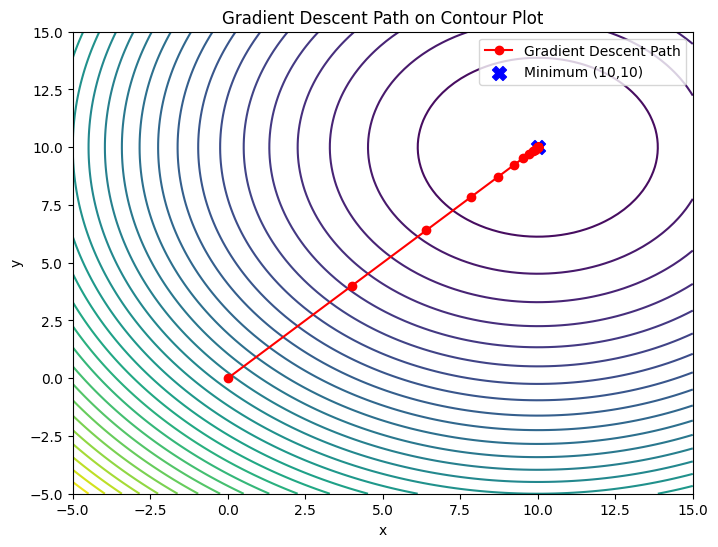

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import math


def f(x):
    return (x[0] - 10)**2 + (x[1] - 10)**2


def gradient(x):
    df_dx = 2 * (x[0] - 10)
    df_dy = 2 * (x[1] - 10)
    return [df_dx, df_dy]


def gradient_descent(x, alpha, eps, N):
    x1 = x[:]
    path = [tuple(x1)]

    for _ in range(N):
        grad = gradient(x1)

        x_new = [0] * len(x1)
        for i in range(len(x1)):
            x_new[i] = x1[i] - grad[i] * alpha

        diff = sum((x_new[i] - x1[i]) ** 2 for i in range(len(x1)))
        denom = sum(x1[i] ** 2 for i in range(len(x1)))

        diff = math.sqrt(diff)
        denom = math.sqrt(denom) if denom != 0 else 1
        diff /= denom

        if diff < eps:
            break

        x1 = x_new
        path.append(tuple(x1))

    return x1, f(x1), path


x_init = [0, 0]
alpha = 0.2
eps = 1e-6
N = 100

optimized_x, final_value, path = gradient_descent(x_init, alpha, eps, N)


path_x, path_y = zip(*path)


x_vals = np.linspace(-5, 15, 100)
y_vals = np.linspace(-5, 15, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f([X, Y])

plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=30, cmap="viridis")
plt.plot(path_x, path_y, marker='o', color='red', label="Gradient Descent Path")
plt.scatter([10], [10], color='blue', marker='X', s=100, label="Minimum (10,10)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Gradient Descent Path on Contour Plot")
plt.show()
